# Modelagem Estatística - Linear Regression Models

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [5]:
x = np.arange(100)

y = 0.5*x - 20 + np.random.randn(len(x))

df = pd.DataFrame({'x':x, 'y':y})

model = sm.ols('y~x', data=df).fit()


print((model.summary()))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.207e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          3.43e-117
Time:                        11:00:37   Log-Likelihood:                -137.14
No. Observations:                 100   AIC:                             278.3
Df Residuals:                      98   BIC:                             283.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.7816      0.191   -103.454      0.0

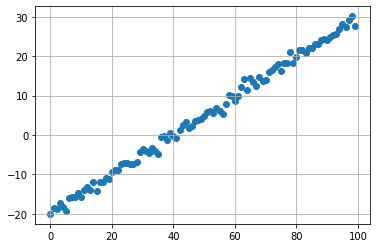

In [7]:
plt.scatter(x,y)
plt.grid()

In [9]:
from urllib.request import urlopen
inFile = 'swim100m.csv'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_kaplan/'
url = url_base + inFile
dados = pd.read_csv(urlopen(url))

In [10]:
dados.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


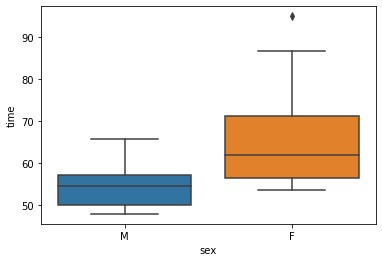

In [11]:
import seaborn as sns

sns.boxplot(data=dados, x='sex', y='time')

In [14]:
from statsmodels.formula.api import ols
import statsmodels.regression.linear_model as sm
from statsmodels.stats.anova import anova_lm

model1 = ols("time ~ sex", dados).fit()  # 1 fator
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           7.28e-06
Time:                        11:09:07   Log-Likelihood:                -219.23
No. Observations:                  62   AIC:                             442.5
Df Residuals:                      60   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1923      1.517     42.986      0.0

In [15]:
print(anova_lm(model1))

            df       sum_sq      mean_sq          F    PR(>F)
sex        1.0  1720.655232  1720.655232  24.132575  0.000007
Residual  60.0  4278.006477    71.300108        NaN       NaN


In [17]:
model2 = ols("time ~ sex + year", dados).fit()   # 2 fatores
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     159.6
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.58e-24
Time:                        11:10:52   Log-Likelihood:                -172.12
No. Observations:                  62   AIC:                             350.2
Df Residuals:                      59   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7168     33.800     16.441      0.0

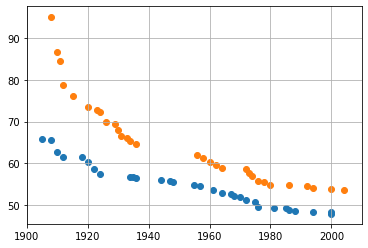

In [21]:
plt.scatter(dados['year'][dados['sex']=='M'], dados['time'][dados['sex']=='M'])
plt.scatter(dados['year'][dados['sex']=='F'], dados['time'][dados['sex']=='F'])
plt.grid()

In [22]:
model3 = ols("time ~ sex * year", dados).fit()   # 2 fatores com interações
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           3.67e-28
Time:                        11:13:27   Log-Likelihood:                -160.30
No. Observations:                  62   AIC:                             328.6
Df Residuals:                      58   BIC:                             337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       697.3012     39.221     17.779

In [51]:
t = np.arange(0,10,0.1)

y = 4 + 3*t + 2*t**2 + 5*np.random.randn(len(t))

M = np.column_stack((np.ones(len(t)), t, t**2))

M2 = np.column_stack((np.ones(len(t)), t, t**2,t**3))

res = sm.OLS(y, M).fit()
    

res2 = sm.OLS(y, M2).fit()
    
# Display the results
print('Summary:')
print(res.summary())



Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          1.97e-115
Time:                        11:32:28   Log-Likelihood:                -290.29
No. Observations:                 100   AIC:                             586.6
Df Residuals:                      97   BIC:                             594.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4195      1.317      2.596

In [52]:
M

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 2.000e-01, 4.000e-02],
       [1.000e+00, 3.000e-01, 9.000e-02],
       [1.000e+00, 4.000e-01, 1.600e-01],
       [1.000e+00, 5.000e-01, 2.500e-01],
       [1.000e+00, 6.000e-01, 3.600e-01],
       [1.000e+00, 7.000e-01, 4.900e-01],
       [1.000e+00, 8.000e-01, 6.400e-01],
       [1.000e+00, 9.000e-01, 8.100e-01],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.100e+00, 1.210e+00],
       [1.000e+00, 1.200e+00, 1.440e+00],
       [1.000e+00, 1.300e+00, 1.690e+00],
       [1.000e+00, 1.400e+00, 1.960e+00],
       [1.000e+00, 1.500e+00, 2.250e+00],
       [1.000e+00, 1.600e+00, 2.560e+00],
       [1.000e+00, 1.700e+00, 2.890e+00],
       [1.000e+00, 1.800e+00, 3.240e+00],
       [1.000e+00, 1.900e+00, 3.610e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.100e+00, 4.410e+00],
       [1.000e+00, 2.200e+00, 4.840e+00],
       [1.000e+00, 2.300e+00, 5.29

In [53]:
res.params

array([3.41953074, 3.99227075, 1.88892749])

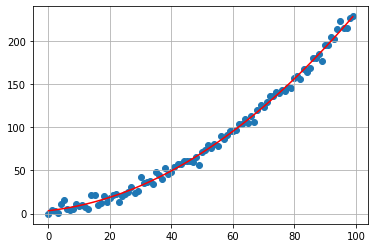

In [54]:
plt.scatter(x,y, label='Original')

y2 = res.params[0] + res.params[1]*t + res.params[2]*t*t

plt.plot(x,y2, label='Regressão', color='red')

plt.grid()

In [55]:
res.conf_int()[0][0]

0.8055773239984427

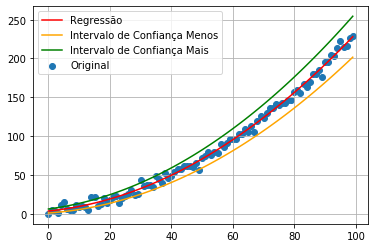

In [56]:
plt.scatter(x,y, label='Original')

y2 = res.params[0] + res.params[1]*t + res.params[2]*t*t

plt.plot(x,y2, label='Regressão', color='red')

plt.grid()

yl = res.conf_int()[0][0] + res.conf_int()[1][0]*t + res.conf_int()[2][0]*t*t

yp = res.conf_int()[0][1] + res.conf_int()[1][1]*t + res.conf_int()[2][1]*t*t

plt.plot(x,yl, label='Intervalo de Confiança Menos', color='orange')

plt.plot(x,yp, label='Intervalo de Confiança Mais', color='green')

plt.legend()




In [57]:
res.conf_int()[1][0]

2.7719629244237503

In [58]:
res.conf_int()[0][1]

6.0334841602034865

In [59]:
res.conf_int()

array([[0.80557732, 6.03348416],
       [2.77196292, 5.21257858],
       [1.76965233, 2.00820264]])

In [60]:
print('Summary:')
print(res2.summary())


Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7406.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          2.05e-113
Time:                        11:32:32   Log-Likelihood:                -290.15
No. Observations:                 100   AIC:                             588.3
Df Residuals:                      96   BIC:                             598.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8268      1.733      1.632

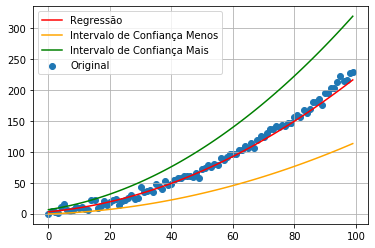

In [63]:
plt.scatter(x,y, label='Original')

y2 = res2.params[0] + res2.params[1]*t + res2.params[2]*t*t

plt.plot(x,y2, label='Regressão', color='red')

plt.grid()

yl = res2.conf_int()[0][0] + res2.conf_int()[1][0]*t + res2.conf_int()[2][0]*t*t

yp = res2.conf_int()[0][1] + res2.conf_int()[1][1]*t + res2.conf_int()[2][1]*t*t

plt.plot(x,yl, label='Intervalo de Confiança Menos', color='orange')

plt.plot(x,yp, label='Intervalo de Confiança Mais', color='green')

plt.legend()

# Exercises

In [64]:
xls = pd.ExcelFile('AvgTemp.xls')

In [67]:
data = xls.parse('Tabelle1')

In [68]:
data.head()

,year,AvgTmp
0,1887,-7.5
1,1888,-6.8
2,1889,-7.1
3,1890,-7.0
4,1891,-6.7


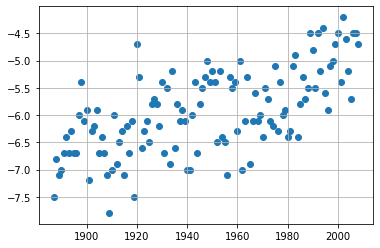

In [70]:
plt.scatter(data.year, data.AvgTmp)
plt.grid()

In [71]:
pearson = data['year'].corr(data['AvgTmp'], method = 'pearson') 
spearman = data['year'].corr(data['AvgTmp'], method = 'spearman') 
tau = data['year'].corr(data['AvgTmp'], method = 'kendall') 
    
print(f'Pearson: {pearson}')
print(f'Spearman: {spearman}')
print(f'Kendall tau: {tau}')

Pearson: 0.6388445026294712
Spearman: 0.6289457851537718
Kendall tau: 0.4591828926737606


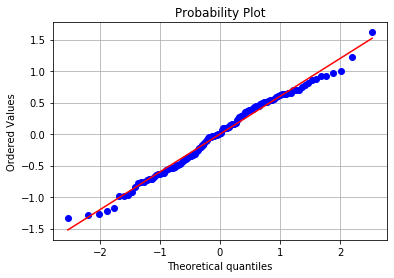

p-valor: 0.400844167748088


In [76]:

model = sm.ols('AvgTmp ~ year', data)
results = model.fit()
    
res_data = results.resid    # Get the values for the residuals
    
stats.probplot(res_data, plot=plt)
plt.grid()
plt.show()
    
_, pVal = stats.normaltest(res_data)

print(f'p-valor: {pVal}')

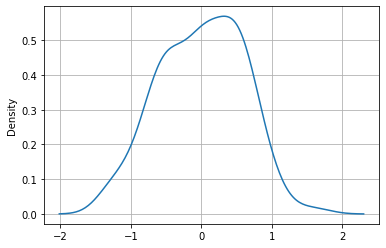

In [79]:
sns.kdeplot(res_data)
plt.grid()

                            OLS Regression Results                            
Dep. Variable:                 AvgTmp   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     82.74
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           2.43e-15
Time:                        07:52:19   Log-Likelihood:                -109.46
No. Observations:                 122   AIC:                             222.9
Df Residuals:                     120   BIC:                             228.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.1840      2.996    -11.074      0.0

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


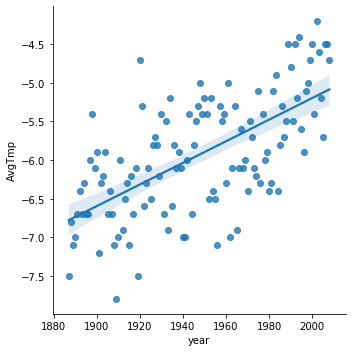

In [81]:
model = sm.ols('AvgTmp ~ year', data)
results = model.fit()
print(results.summary())
    
sns.lmplot('year', 'AvgTmp', data)
plt.show()

In [82]:
ci = results.conf_int()
    
print(ci)

                   0          1
Intercept -39.116796 -27.251122
year        0.010948   0.017040
